In [1]:
import spacy
from spacy.matcher import PhraseMatcher
import seaborn as sns

In [2]:
spacy.prefer_gpu()
nlp = spacy.load("en_core_web_sm")
skills = 'jz_skill_patterns.jsonl'

matcher = PhraseMatcher(nlp.vocab)

ruler = nlp.add_pipe("entity_ruler", before='ner').from_disk('jz_skill_patterns.jsonl')

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('scraper/training_data/Cleaned_cleaned_skills.csv')

In [5]:
df

,Unnamed: 0,job_title,job_desc,location,skills
0,0,C++ Developer - Prop Trading,Multi-Strategy Proprietary Trading Firm seeks ...,"New York, NY",C
1,1,C++ Engineer,Immediate need for a C++ Engineer for a 6+ mon...,"Culver City, CA",C
2,2,C++ Developer,A Contract position at a preeminent global fin...,"New York, NY",C
3,3,AX Software Developer,"Our client, located in downtown Chicago and re...","Chicago, IL",X
4,4,Sr C++ Developer,Leading Investment Bank Senior developer resp...,"New York, NY",C
...,...,...,...,...,...
13580,13587,Sr. Object Oriented Programmer Analyst - DALLAS,Job Description:• High-visibility new applicat...,"Fort Worth, TX",(SENCHA EXTJS ) (ORACLE (JAVA ) (WEB SERVICES ...
13581,13588,Tier II Helpdesk Specialist,Exeter is looking for a Tier II Help Desk / Se...,Guantanamo Bay,Security CCNA Microsoft Certified Professional...
13582,13589,User Experience (UX) Developer - Tulsa,Software Developer - User Experience (UX)About...,"Tulsa, OK",UX design and development Axure RP wireframing...
13583,13590,Team Lead Engineer,"Our client, located in the NYC is seeking a Te...","New York, NY",Team Lead Engineer front end developer full st...


In [6]:
descs = df.job_desc.iloc[0:1000]

In [7]:
descs

0      Multi-Strategy Proprietary Trading Firm seeks ...
1      Immediate need for a C++ Engineer for a 6+ mon...
2      A Contract position at a preeminent global fin...
3      Our client, located in downtown Chicago and re...
4      Leading Investment Bank  Senior developer resp...
                             ...                        
995    Greetings from Sonata! We are currently seekin...
996     Location: NorcrossPay: $75,000 - $115,000, ba...
997    DB2 LUW DBA Atlanta, GALong term Job Descripti...
998    Expert Technical Solutions is seeking a highly...
999    Hi Remedy DeveloperLocation: Rochester NYDurat...
Name: job_desc, Length: 1000, dtype: object

In [87]:
skills_mega = []
for i in descs:
    doc = nlp(text=i)
    labels = [(ent.text, ent.label_) for ent in doc.ents]
    skills = [ent for ent in labels if ent[1] == 'SKILL']
    skills_mega.append(skills)
    


In [88]:
# skills_mega

In [89]:
df2 = df.iloc[:, 0:1000]

In [90]:
df2 = df2.drop(index=range(1000, 13585))

In [91]:
df2 = df2.drop(columns="Unnamed: 0")

In [92]:
df2['skills_extracted'] = skills_mega

In [93]:
df2

,job_title,job_desc,location,skills,skills_extracted
0,C++ Developer - Prop Trading,Multi-Strategy Proprietary Trading Firm seeks ...,"New York, NY",C,"[(C++, SKILL), (C++, SKILL), (PYTHON, SKILL), ..."
1,C++ Engineer,Immediate need for a C++ Engineer for a 6+ mon...,"Culver City, CA",C,"[(C++, SKILL), (C++, SKILL), (Java, SKILL), (3..."
2,C++ Developer,A Contract position at a preeminent global fin...,"New York, NY",C,"[(business, SKILL), (support, SKILL), (busines..."
3,AX Software Developer,"Our client, located in downtown Chicago and re...","Chicago, IL",X,"[(Software, SKILL), (Software, SKILL), (design..."
4,Sr C++ Developer,Leading Investment Bank Senior developer resp...,"New York, NY",C,"[(software, SKILL), (design, SKILL), (C++, SKI..."
...,...,...,...,...,...
995,Kentico CMS,Greetings from Sonata! We are currently seekin...,"Plano, TX",Kentico CMS,"[(Content Management, SKILL), (Design, SKILL),..."
996,C# Developer,"Location: NorcrossPay: $75,000 - $115,000, ba...","Norcross, GA",Agile C SQL,"[(computer science, SKILL), (C, SKILL), (testi..."
997,DB2 LUW DBA,"DB2 LUW DBA Atlanta, GALong term Job Descripti...","Atlanta, GA",DB2 LUW DBA,"[(databases, SKILL), (Database, SKILL), (datab..."
998,Deployment Engineer,Expert Technical Solutions is seeking a highly...,"Atlanta, GA",windows sql,"[(Deployment, SKILL), (Deployment, SKILL), (an..."


In [86]:
df2.to_csv('skills_train.csv')

In [15]:
skills_mega

[[('C++', 'SKILL'),
  ('C++', 'SKILL'),
  ('PYTHON', 'SKILL'),
  ('SQL', 'SKILL'),
  ('C++', 'SKILL'),
  ('Computer Science', 'SKILL'),
  ('C++', 'SKILL'),
  ('Linux', 'SKILL'),
  ('C++', 'SKILL'),
  ('Linux', 'SKILL'),
  ('Shell', 'SKILL')],
 [('C++', 'SKILL'),
  ('C++', 'SKILL'),
  ('Java', 'SKILL'),
  ('3D', 'SKILL'),
  ('Android', 'SKILL'),
  ('iOS', 'SKILL')],
 [('business', 'SKILL'),
  ('support', 'SKILL'),
  ('business', 'SKILL'),
  ('C++', 'SKILL'),
  ('Scala', 'SKILL'),
  ('support', 'SKILL'),
  ('design', 'SKILL'),
  ('support', 'SKILL'),
  ('time to market', 'SKILL'),
  ('business', 'SKILL'),
  ('business', 'SKILL'),
  ('software', 'SKILL'),
  ('design', 'SKILL'),
  ('support', 'SKILL'),
  ('interaction', 'SKILL'),
  ('testing', 'SKILL'),
  ('support', 'SKILL'),
  ('business', 'SKILL'),
  ('C++', 'SKILL'),
  ('Linux', 'SKILL'),
  ('languages', 'SKILL'),
  ('testing', 'SKILL'),
  ('Java', 'SKILL'),
  ('Scala', 'SKILL')],
 [('Software', 'SKILL'),
  ('Software', 'SKILL'),
  ('d

In [16]:
skills_count = []
for i in skills_mega:
    for j in i:
        skills_count.append(j[0])

In [17]:
skills_count

['C++',
 'C++',
 'PYTHON',
 'SQL',
 'C++',
 'Computer Science',
 'C++',
 'Linux',
 'C++',
 'Linux',
 'Shell',
 'C++',
 'C++',
 'Java',
 '3D',
 'Android',
 'iOS',
 'business',
 'support',
 'business',
 'C++',
 'Scala',
 'support',
 'design',
 'support',
 'time to market',
 'business',
 'business',
 'software',
 'design',
 'support',
 'interaction',
 'testing',
 'support',
 'business',
 'C++',
 'Linux',
 'languages',
 'testing',
 'Java',
 'Scala',
 'Software',
 'Software',
 'design',
 'support',
 'software',
 'support',
 'design',
 'design',
 'server',
 'server',
 'server',
 'SQL',
 'SQL',
 'engineering',
 'database design',
 'Design',
 'software',
 'design',
 'Design',
 'user interface',
 'database',
 'design',
 'software',
 'software',
 'design',
 'release',
 'deployment',
 'Support',
 'software',
 'support',
 'CRM',
 'software',
 'design',
 'C++',
 'testing',
 'support',
 'C++',
 'data structures',
 'memory management',
 'C++',
 'Software',
 'C',
 'software',
 'business',
 'business',

In [18]:
df_skills = pd.DataFrame(skills_count)

In [19]:
df_skills.nunique()

0    695
dtype: int64

In [20]:
df_skills.value_counts()

business                     1121
design                        863
software                      775
support                       668
SQL                           469
                             ... 
embedded system                 1
Marathon                        1
Manufacturing Engineering       1
enterprise system               1
xCode                           1
Length: 695, dtype: int64

In [21]:
df_wordcount = df_skills.value_counts()

In [22]:
# sns.hist(data=df_wordcount)

In [23]:
df_wordcount

business                     1121
design                        863
software                      775
support                       668
SQL                           469
                             ... 
embedded system                 1
Marathon                        1
Manufacturing Engineering       1
enterprise system               1
xCode                           1
Length: 695, dtype: int64

In [24]:
df_wc_df = pd.DataFrame(df_wordcount)

In [25]:
df_wc_df.columns.tolist()

[0]

In [26]:
# sns.lineplot(data=df_wc_df)

In [27]:
df_wc_df['new_index'] = range(0, 695)

In [28]:
df_wc_df['name'] = df_wc_df.index

In [29]:
df_wc_df = df_wc_df.set_index('new_index')

In [30]:
df_wc_df

,0,name
new_index,,
0,1121,"(business,)"
1,863,"(design,)"
2,775,"(software,)"
3,668,"(support,)"
4,469,"(SQL,)"
...,...,...
690,1,"(embedded system,)"
691,1,"(Marathon,)"
692,1,"(Manufacturing Engineering,)"


<AxesSubplot: xlabel='new_index'>

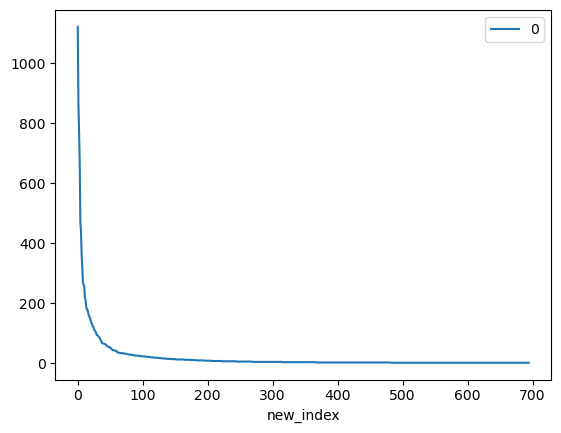

In [31]:
sns.lineplot(data=df_wc_df)

In [32]:
df_wc_df.describe()

,0
count,695.000000
mean,20.339568
std,77.932634
min,1.000000
25%,1.000000
50%,3.000000
75%,11.000000
max,1121.000000


In [33]:
df_wc_df_non_one = df_wc_df.drop(df_wc_df[df_wc_df[0] < 3].index)

In [34]:
df_wc_df_non_one

,0,name
new_index,,
0,1121,"(business,)"
1,863,"(design,)"
2,775,"(software,)"
3,668,"(support,)"
4,469,"(SQL,)"
...,...,...
362,3,"(computer vision,)"
363,3,"(SQLite,)"
364,3,"(Node Js,)"


<AxesSubplot: xlabel='new_index'>

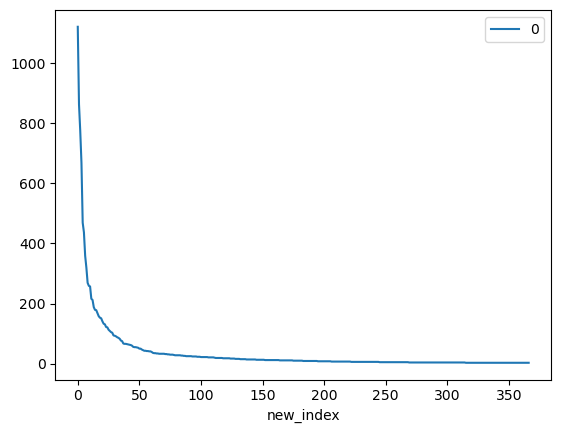

In [35]:
sns.lineplot(df_wc_df_non_one)

In [36]:
df_wc_df_non_one.describe()

,0
count,367.000000
mean,37.310627
std,104.423457
min,3.000000
25%,4.000000
50%,9.000000
75%,25.000000
max,1121.000000


In [37]:
df

,Unnamed: 0,job_title,job_desc,location,skills
0,0,C++ Developer - Prop Trading,Multi-Strategy Proprietary Trading Firm seeks ...,"New York, NY",C
1,1,C++ Engineer,Immediate need for a C++ Engineer for a 6+ mon...,"Culver City, CA",C
2,2,C++ Developer,A Contract position at a preeminent global fin...,"New York, NY",C
3,3,AX Software Developer,"Our client, located in downtown Chicago and re...","Chicago, IL",X
4,4,Sr C++ Developer,Leading Investment Bank Senior developer resp...,"New York, NY",C
...,...,...,...,...,...
13580,13587,Sr. Object Oriented Programmer Analyst - DALLAS,Job Description:• High-visibility new applicat...,"Fort Worth, TX",(SENCHA EXTJS ) (ORACLE (JAVA ) (WEB SERVICES ...
13581,13588,Tier II Helpdesk Specialist,Exeter is looking for a Tier II Help Desk / Se...,Guantanamo Bay,Security CCNA Microsoft Certified Professional...
13582,13589,User Experience (UX) Developer - Tulsa,Software Developer - User Experience (UX)About...,"Tulsa, OK",UX design and development Axure RP wireframing...
13583,13590,Team Lead Engineer,"Our client, located in the NYC is seeking a Te...","New York, NY",Team Lead Engineer front end developer full st...


In [38]:
desc_test = df.job_desc.iloc[1000:-1]

In [39]:
desc_test

1000     SAP HR ABAP ConsultantShould have at least 4 +...
1001      A minimum of 3 years of experience in impleme...
1002     Supervisor Job Duties:Provides technical leade...
1003     Title: Tax Analyst (11-164-589) Location: San ...
1004     Hi,Greetings from Lenora,Please find the below...
                               ...                        
13579    Title: Reference Data Production Support Analy...
13580    Job Description:• High-visibility new applicat...
13581    Exeter is looking for a Tier II Help Desk / Se...
13582    Software Developer - User Experience (UX)About...
13583    Our client, located in the NYC is seeking a Te...
Name: job_desc, Length: 12584, dtype: object

In [40]:
skills_omega = []
for i in desc_test:
    doc = nlp(text=i)
    labels = [(ent.text, ent.label_) for ent in doc.ents]
    skills = [ent for ent in labels if ent[1] == 'SKILL']
    skills_omega.append(skills)

In [41]:
df5 = df.iloc[1000:-1, :]

In [42]:
df5['skills_nlp'] = range(len(df5.job_title))

C:\Users\bohnd\AppData\Local\Temp\ipykernel_11628\2042842637.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['skills_nlp'] = range(len(df5.job_title))


In [43]:
df5['skills_nlp'] = skills_omega

C:\Users\bohnd\AppData\Local\Temp\ipykernel_11628\1617633820.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['skills_nlp'] = skills_omega


In [44]:
df5

,Unnamed: 0,job_title,job_desc,location,skills,skills_nlp
1000,1003,SAP HR ABAP Consultant,SAP HR ABAP ConsultantShould have at least 4 +...,"Newport News, VA",SAP HR ABAP,[]
1001,1004,Softeon WMS,A minimum of 3 years of experience in impleme...,"Atlanta, GA",Softeon WMS,"[(documentation, SKILL), (functional testing, ..."
1002,1005,IT Supervisor,Supervisor Job Duties:Provides technical leade...,"Atlanta, GA",Net and SQL,"[(monitoring, SKILL), (monitoring, SKILL), (so..."
1003,1006,Tax Analyst,Title: Tax Analyst (11-164-589) Location: San ...,"Milpitas, CA",Tax Analyst,"[(documentation, SKILL), (Accounting, SKILL), ..."
1004,1007,HFM DEVELOPER,"Hi,Greetings from Lenora,Please find the below...","San Francisco, CA",HFM and FDM,"[(business, SKILL), (SQL, SKILL), (Accounting,..."
...,...,...,...,...,...,...
13579,13586,Production Support Analyst - Reference Data,Title: Reference Data Production Support Analy...,"New York, NY",UNIX Windows Shell Scripts SQL Sybase Oracle M...,"[(Support, SKILL), (Windows, SKILL), (Shell, S..."
13580,13587,Sr. Object Oriented Programmer Analyst - DALLAS,Job Description:• High-visibility new applicat...,"Fort Worth, TX",(SENCHA EXTJS ) (ORACLE (JAVA ) (WEB SERVICES ...,"[(Oracle, SKILL), (Linux, SKILL), (Java, SKILL..."
13581,13588,Tier II Helpdesk Specialist,Exeter is looking for a Tier II Help Desk / Se...,Guantanamo Bay,Security CCNA Microsoft Certified Professional...,"[(Help Desk, SKILL), (support, SKILL), (help d..."
13582,13589,User Experience (UX) Developer - Tulsa,Software Developer - User Experience (UX)About...,"Tulsa, OK",UX design and development Axure RP wireframing...,"[(Software, SKILL), (monitoring, SKILL), (HTML..."


In [46]:
# pd.write_csv

In [47]:
# df5.to_csv('skills_omega_version.csv')

In [48]:
df5

,Unnamed: 0,job_title,job_desc,location,skills,skills_nlp
1000,1003,SAP HR ABAP Consultant,SAP HR ABAP ConsultantShould have at least 4 +...,"Newport News, VA",SAP HR ABAP,[]
1001,1004,Softeon WMS,A minimum of 3 years of experience in impleme...,"Atlanta, GA",Softeon WMS,"[(documentation, SKILL), (functional testing, ..."
1002,1005,IT Supervisor,Supervisor Job Duties:Provides technical leade...,"Atlanta, GA",Net and SQL,"[(monitoring, SKILL), (monitoring, SKILL), (so..."
1003,1006,Tax Analyst,Title: Tax Analyst (11-164-589) Location: San ...,"Milpitas, CA",Tax Analyst,"[(documentation, SKILL), (Accounting, SKILL), ..."
1004,1007,HFM DEVELOPER,"Hi,Greetings from Lenora,Please find the below...","San Francisco, CA",HFM and FDM,"[(business, SKILL), (SQL, SKILL), (Accounting,..."
...,...,...,...,...,...,...
13579,13586,Production Support Analyst - Reference Data,Title: Reference Data Production Support Analy...,"New York, NY",UNIX Windows Shell Scripts SQL Sybase Oracle M...,"[(Support, SKILL), (Windows, SKILL), (Shell, S..."
13580,13587,Sr. Object Oriented Programmer Analyst - DALLAS,Job Description:• High-visibility new applicat...,"Fort Worth, TX",(SENCHA EXTJS ) (ORACLE (JAVA ) (WEB SERVICES ...,"[(Oracle, SKILL), (Linux, SKILL), (Java, SKILL..."
13581,13588,Tier II Helpdesk Specialist,Exeter is looking for a Tier II Help Desk / Se...,Guantanamo Bay,Security CCNA Microsoft Certified Professional...,"[(Help Desk, SKILL), (support, SKILL), (help d..."
13582,13589,User Experience (UX) Developer - Tulsa,Software Developer - User Experience (UX)About...,"Tulsa, OK",UX design and development Axure RP wireframing...,"[(Software, SKILL), (monitoring, SKILL), (HTML..."


In [49]:
skills_omega_count = []
for i in skills_omega:
    for j in i:
        skills_omega_count.append(j[0])

In [50]:
df_omega_skills = pd.DataFrame(skills_omega_count)

In [51]:
df_omega_skills

,0
0,documentation
1,functional testing
2,software
3,software
4,business
...,...
178750,HTML
178751,analytics
178752,software
178753,Java


In [52]:
df_count_skills = df_omega_skills.value_counts()

In [53]:
df_count_skills

business              13603
design                 9799
software               9633
support                9425
testing                5119
                      ...  
inVision                  1
image segmentation        1
image quality             1
Package Manager           1
zookeeper                 1
Length: 1713, dtype: int64

In [54]:
df_o = pd.DataFrame(df_count_skills)

In [55]:
df_o

,0
0,
business,13603
design,9799
software,9633
support,9425
testing,5119
...,...
inVision,1
image segmentation,1
image quality,1


In [56]:
df_o['index'] = range(0, 1713)

In [57]:
df_o

,0,index
0,,
business,13603,0
design,9799,1
software,9633,2
support,9425,3
testing,5119,4
...,...,...
inVision,1,1708
image segmentation,1,1709
image quality,1,1710


In [58]:
df_o['name'] = df_o.index

In [59]:
df_o

,0,index,name
0,,,
business,13603,0,"(business,)"
design,9799,1,"(design,)"
software,9633,2,"(software,)"
support,9425,3,"(support,)"
testing,5119,4,"(testing,)"
...,...,...,...
inVision,1,1708,"(inVision,)"
image segmentation,1,1709,"(image segmentation,)"
image quality,1,1710,"(image quality,)"


In [60]:
df_o=df_o.set_index('index')

In [61]:
df_o=df_o.rename(columns={0: 'count'})

<AxesSubplot: xlabel='index', ylabel='count'>

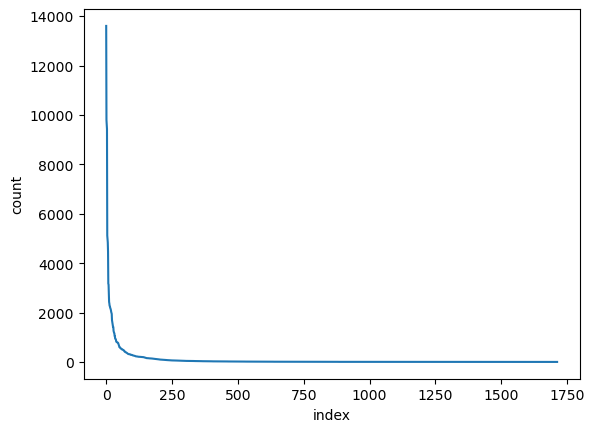

In [62]:
sns.lineplot(data=df_o,x='index', y='count')

In [63]:
df_o

,count,name
index,,
0,13603,"(business,)"
1,9799,"(design,)"
2,9633,"(software,)"
3,9425,"(support,)"
4,5119,"(testing,)"
...,...,...
1708,1,"(inVision,)"
1709,1,"(image segmentation,)"
1710,1,"(image quality,)"


In [64]:
df_wc_df

,0,name
new_index,,
0,1121,"(business,)"
1,863,"(design,)"
2,775,"(software,)"
3,668,"(support,)"
4,469,"(SQL,)"
...,...,...
690,1,"(embedded system,)"
691,1,"(Marathon,)"
692,1,"(Manufacturing Engineering,)"


In [65]:
df_o.describe()

,count
count,1713.000000
mean,104.352014
std,622.222246
min,1.000000
25%,2.000000
50%,5.000000
75%,23.000000
max,13603.000000


In [66]:
df_wc_df.describe()

,0
count,695.000000
mean,20.339568
std,77.932634
min,1.000000
25%,1.000000
50%,3.000000
75%,11.000000
max,1121.000000


In [67]:
df_training = df_wc_df

In [68]:
df_testing = df_o

In [69]:
df_training=df_training.rename(columns={0: 'count'})

In [70]:
df_training.sum()

count                                                14136
name     (business, design, software, support, SQL, tes...
dtype: object

In [71]:
df_training['sum_to_whole'] = df_training['count'] / 14136 * 100

In [72]:
df_training

,count,name,sum_to_whole
new_index,,,
0,1121,"(business,)",7.930108
1,863,"(design,)",6.104980
2,775,"(software,)",5.482456
3,668,"(support,)",4.725523
4,469,"(SQL,)",3.317770
...,...,...,...
690,1,"(embedded system,)",0.007074
691,1,"(Marathon,)",0.007074
692,1,"(Manufacturing Engineering,)",0.007074


In [73]:
df_testing.sum()

count                                               178755
name     (business, design, software, support, testing,...
dtype: object

In [74]:
df_testing['sum_to_whole'] = df_testing['count'] / 178755 * 100

In [75]:
df_testing

,count,name,sum_to_whole
index,,,
0,13603,"(business,)",7.609857
1,9799,"(design,)",5.481805
2,9633,"(software,)",5.388940
3,9425,"(support,)",5.272580
4,5119,"(testing,)",2.863696
...,...,...,...
1708,1,"(inVision,)",0.000559
1709,1,"(image segmentation,)",0.000559
1710,1,"(image quality,)",0.000559


<AxesSubplot: xlabel='index', ylabel='sum_to_whole'>

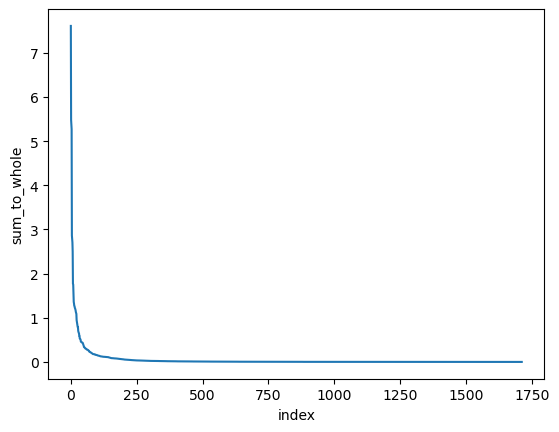

In [76]:
sns.lineplot(data=df_testing, x='index', y='sum_to_whole')

In [77]:
df_training.index=df_training.index.rename('index')

In [78]:
df_training

,count,name,sum_to_whole
index,,,
0,1121,"(business,)",7.930108
1,863,"(design,)",6.104980
2,775,"(software,)",5.482456
3,668,"(support,)",4.725523
4,469,"(SQL,)",3.317770
...,...,...,...
690,1,"(embedded system,)",0.007074
691,1,"(Marathon,)",0.007074
692,1,"(Manufacturing Engineering,)",0.007074


<AxesSubplot: xlabel='index', ylabel='sum_to_whole'>

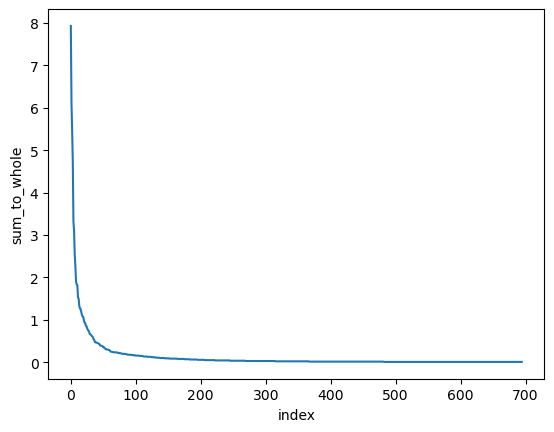

In [79]:
sns.lineplot(data=df_training, x='index', y='sum_to_whole')

In [80]:
df_training['id'] = 'tr'

In [81]:
df_testing['id'] = 'te'

In [82]:
df_training

,count,name,sum_to_whole,id
index,,,,
0,1121,"(business,)",7.930108,tr
1,863,"(design,)",6.104980,tr
2,775,"(software,)",5.482456,tr
3,668,"(support,)",4.725523,tr
4,469,"(SQL,)",3.317770,tr
...,...,...,...,...
690,1,"(embedded system,)",0.007074,tr
691,1,"(Marathon,)",0.007074,tr
692,1,"(Manufacturing Engineering,)",0.007074,tr


In [83]:
df_compare = pd.concat([df_testing, df_training])

In [84]:
df_compare

,count,name,sum_to_whole,id
index,,,,
0,13603,"(business,)",7.609857,te
1,9799,"(design,)",5.481805,te
2,9633,"(software,)",5.388940,te
3,9425,"(support,)",5.272580,te
4,5119,"(testing,)",2.863696,te
...,...,...,...,...
690,1,"(embedded system,)",0.007074,tr
691,1,"(Marathon,)",0.007074,tr
692,1,"(Manufacturing Engineering,)",0.007074,tr


<AxesSubplot: xlabel='index', ylabel='sum_to_whole'>

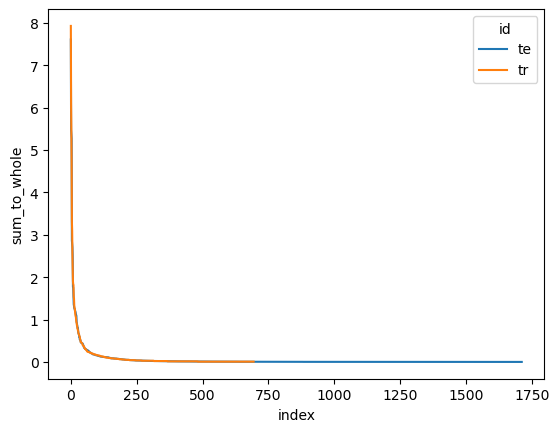

In [85]:
sns.lineplot(data=df_compare, x='index', y='sum_to_whole', hue='id')